In [261]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np, scipy.stats as st

# variaveis

In [262]:
path = "./220607_cluster2/"
cluster = "c2"
vm = "vm3"
infile = path + "TxMonitor_" + cluster + "_" + vm + ".csv"
outfile_cpu = "grafico_cpu_" + cluster + "_" + vm + ".pdf"
outfile_netin = "grafico_netin_" + cluster + "_" + vm + ".pdf"
outfile_netout = "grafico_netout_" + cluster + "_" + vm + ".pdf"
throughput = []
if cluster == "c1":
    throughput = [
    9.70,
    19.20,
    32.40,
    30.00,
    18.80,
    17.30,
    21.30,
    18.40,
    20.80,
    18.80,
    19.80]
else:
    throughput = [
    9.60,
    19.30,
    32.10,
    24.60,
    17.40,
    15.20,
    18.00,
    17.60,
    18.10,
    17.20,
    14.30]

vm_data = pd.read_csv(infile)

# cpu

In [263]:
vm_cpu_mean = []
vm_mem_mean = []
vm_cpu_erro = []
vm_filtro = []
for i in range(1,12):
    l_round_x = vm_data.query('round==%s'%i)
    cpu = l_round_x['cpu(%)']
    memoria = l_round_x['memoria(%)']
    vm_filtro.append(cpu.tolist())
    #print(cpu)
    cpu_mean = np.mean(cpu)
    mem_mean = np.mean(memoria)
    cpu_erro = st.t.interval(0.05, len(cpu)-1, loc=np.mean(cpu), scale=st.sem(cpu))
    vm_cpu_mean.append(cpu_mean)
    vm_mem_mean.append(mem_mean)
    vm_cpu_erro.append(cpu_erro[1] - cpu_erro[0])


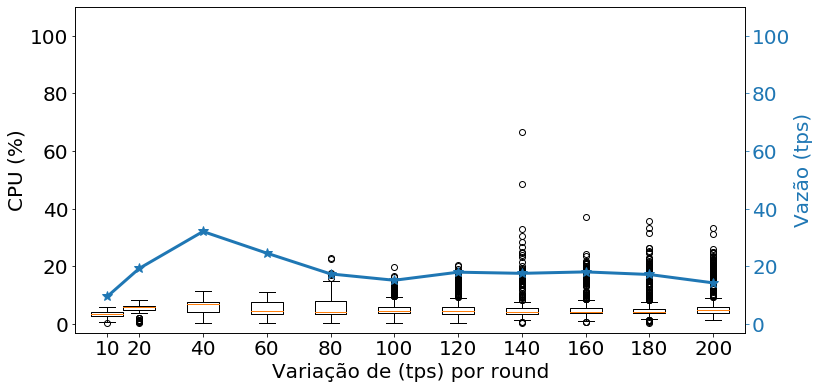

In [265]:
x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
y = throughput
p = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))
ax.set_xlabel('Variação de (tps) por round')
ax.set_ylabel('CPU (%)')
ax.set_ylim(-3, 110)
ax.set_yticks(range(0, 110, 20))
ax.boxplot(vm_filtro, widths=10 ,labels=x, positions=p)
ax2 = ax.twinx()
ax2.set_ylabel('Vazão (tps)',color='#1f77b4')
ax2.set_ylim(-3, 110)
ax2.tick_params(color='#1f77b4', labelcolor='#1f77b4')
ax2.set_xlim(0,210)
ax2.plot(p,y,marker="*",label="vazão", linewidth=3, markersize=10)
plt.yticks([0, 20, 40, 60, 80, 100])
#Legenda_b = mpatches.Patch(color='#1f77b4', label='Vazão') 
#Legenda_c = mpatches.Patch(color='black', label='Boxplot uso CPU') 
#plt.legend(handles=[Legenda_b,Legenda_c] , loc='upper left')
plt.savefig(outfile_cpu)
plt.show()

# Net-out

In [266]:
vm_netout_mean = []
vm_netout_erro = []
vm_filtro = []
for i in range(1,12):
    l_round_x = vm_data.query('round==%s'%i)
    netout = l_round_x['Net-out(bytes)d'] / (1024**2) # Values in MBytes
    vm_filtro.append(netout.tolist())
    netout_mean = np.mean(netout)
    netout_max = np.max(netout)
    netout_erro = st.t.interval(0.05, len(netout)-1, loc=np.mean(netout), scale=st.sem(netout))
    vm_netout_mean.append(netout_mean)
    vm_netout_erro.append(netout_erro[1] - netout_erro[0])
    print(i, netout_mean, np.min(netout), np.max(netout))    # NAO PODE TER VALOR NEGATIVO AQUI CORRIGIR!

1 0.07285172230488546 0.008574485778808594 0.11395549774169922
2 0.13149185703225333 0.008134841918945312 0.185272216796875
3 0.20567309435676126 0.007134437561035156 0.3477201461791992
4 0.19875521537585136 0.00777435302734375 0.5915699005126953
5 0.1938407496402138 0.008544921875 0.6933002471923828
6 0.2071831949907749 0.007693290710449219 0.9468221664428711
7 -0.004362976055564974 -85.55446147918701 0.7618675231933594
8 0.02653559032651678 -85.97746562957764 0.8827028274536133
9 0.20744018024868435 -100.18048000335693 100.1948652267456
10 0.013536896593993325 -112.70203113555908 1.1827259063720703
11 0.06760525424810801 -120.7979097366333 1.1100244522094727


In [267]:
vm_netout_cum = []
for i in range(1,12):
    l_round_x = vm_data.query('round==%s'%i)
    data = l_round_x['Net-out(bytes)'] / (1024**2) # Values in MBytes
    data_max = np.max(data)
    vm_netout_cum.append( data_max )
    print(i, data_max)

1 5.4129133224487305
2 9.626006126403809
3 17.503331184387207
4 31.027161598205566
5 55.268202781677246
6 83.29774284362793
7 83.78203678131104
8 98.90029811859131
9 112.01769733428955
10 120.78536605834961
11 161.2809133529663


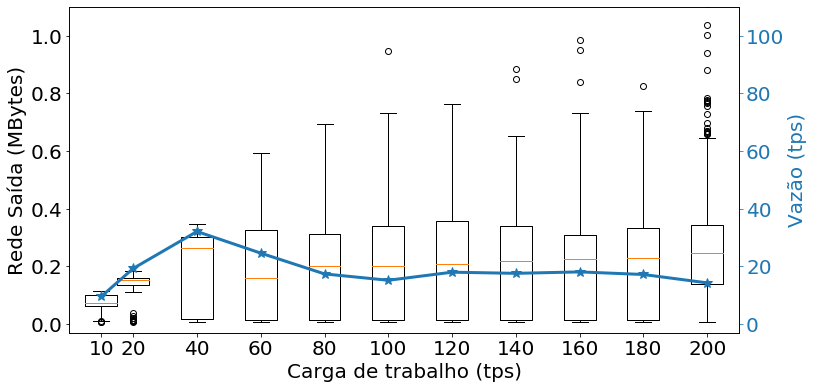

In [256]:
outfile = outfile_netout
x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
y = throughput

p = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))

ax.set_xlabel('Carga de trabalho (tps)')
ax.set_ylabel('Rede Saída (MBytes)')
ax.set_ylim(-0.03, 1.10)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.boxplot(vm_filtro, widths=10 ,labels=x, positions=p)

ax2 = ax.twinx()
ax2.set_ylabel('Vazão (tps)',color='#1f77b4')
ax2.set_ylim(-3, 110)
ax2.tick_params(color='#1f77b4', labelcolor='#1f77b4')
ax2.set_xlim(0,210)
ax2.plot(p,y,marker="*",label="vazão", linewidth=3, markersize=10)
plt.yticks([0, 20, 40, 60, 80, 100])

#Legenda_b = mpatches.Patch(color='#1f77b4', label='Vazão') 
#Legenda_c = mpatches.Patch(color='black', label='Boxplot uso CPU') 
#plt.legend(handles=[Legenda_b,Legenda_c] , loc='upper left')
plt.savefig(outfile)
plt.show()

# Net-in

In [268]:
vm_netin_mean = []
vm_netin_erro = []
vm_filtro = []
for i in range(1,12):
    l_round_x = vm_data.query('round==%s'%i)
    netin = l_round_x['Net-in(bytes)d'] / (1024**2) # Values in MBytes
    vm_filtro.append(netin.tolist())
    #print(cpu)
    netin_mean = np.mean(netin)
    netin_erro = st.t.interval(0.05, len(netin)-1, loc=np.mean(netin), scale=st.sem(netin))
    vm_netin_mean.append(netin_mean)
    vm_netin_erro.append(netin_erro[1] - netin_erro[0])
    print(i, netin_mean, np.min(netin), np.max(netin))    # NAO PODE TER VALOR NEGATIVO AQUI CORRIGIR!

1 0.14984569034060916 0.008128166198730469 0.33340930938720703
2 0.2893994736344847 0.007802009582519531 0.4913139343261719
3 0.48175794938031363 0.0065898895263671875 0.8417110443115234
4 0.49015592917417866 0.006764411926269531 1.6961393356323242
5 0.49225790793435614 0.0072307586669921875 1.5830965042114258
6 0.5336180373803893 0.007142066955566406 1.7464561462402344
7 -0.007062564560719982 -216.65305137634277 1.565816879272461
8 0.07609552034851952 -215.8551197052002 1.8146276473999023
9 0.5353048200960513 -254.12064743041992 254.13419342041016
10 0.04192257405922166 -289.70588779449463 2.7713966369628906
11 0.18217317488834336 -314.7757520675659 2.6485671997070312


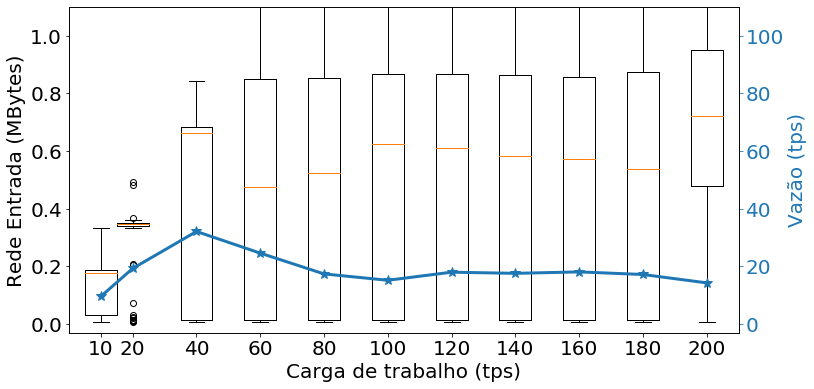

In [269]:
x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
outfile = outfile_netin
y = throughput

p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))

ax.set_xlabel('Carga de trabalho (tps)')
ax.set_ylabel('Rede Entrada (MBytes)')
ax.set_ylim(-0.03, 1.10)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.boxplot(vm_filtro, widths=10 ,labels=x, positions=p)

ax2 = ax.twinx()
ax2.set_ylabel('Vazão (tps)',color='#1f77b4')
ax2.set_ylim(-3, 110)
ax2.tick_params(color='#1f77b4', labelcolor='#1f77b4')
ax2.set_xlim(0,210)
ax2.plot(p,y,marker="*",label="vazão", linewidth=3, markersize=10)
plt.yticks([0, 20, 40, 60, 80, 100])

#Legenda_b = mpatches.Patch(color='#1f77b4', label='Vazão') 
#Legenda_c = mpatches.Patch(color='black', label='Boxplot uso CPU') 
#plt.legend(handles=[Legenda_b,Legenda_c] , loc='upper left')
plt.savefig(outfile)
plt.show()